In [545]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [546]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [547]:
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [548]:
stock_list.head()

,종목코드,종목명
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


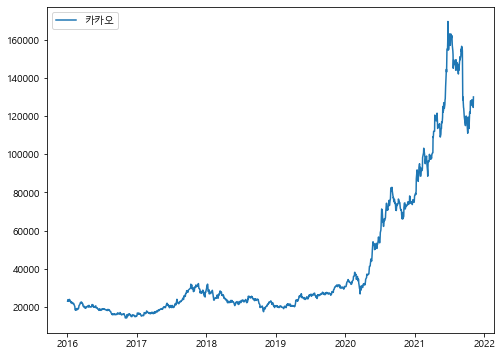

In [549]:
name = '카카오'
fromdate = str(20160101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

data = df1['종가']

plt.figure(figsize=(8, 6))
plt.plot(data)
plt.legend([f'{name}'])
plt.show()

In [550]:
seri = df1['종가']

In [551]:
df = pd.DataFrame(seri, columns=['종가','일계도','이계도','일계도부호','이계도부호'])
df.head()

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2016-01-04,23142,NaN,NaN,NaN,NaN
2016-01-05,23503,NaN,NaN,NaN,NaN
2016-01-06,23905,NaN,NaN,NaN,NaN
2016-01-07,23544,NaN,NaN,NaN,NaN
2016-01-08,23122,NaN,NaN,NaN,NaN


In [552]:
df['일계도'][0] = 0
df.head()


C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/829604211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][0] = 0


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2016-01-04,23142,0,NaN,NaN,NaN
2016-01-05,23503,NaN,NaN,NaN,NaN
2016-01-06,23905,NaN,NaN,NaN,NaN
2016-01-07,23544,NaN,NaN,NaN,NaN
2016-01-08,23122,NaN,NaN,NaN,NaN


In [553]:
for i in range(1, len(seri)):
    df['일계도'][i] = df['종가'][i] - df['종가'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3311632609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][i] = df['종가'][i] - df['종가'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2016-01-04,23142,0,NaN,NaN,NaN
2016-01-05,23503,361,NaN,NaN,NaN
2016-01-06,23905,402,NaN,NaN,NaN
2016-01-07,23544,-361,NaN,NaN,NaN
2016-01-08,23122,-422,NaN,NaN,NaN


In [554]:
df['이계도'][0] = 0
for i in range(1, len(seri)):
    df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3300555474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][0] = 0
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3300555474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2016-01-04,23142,0,0,NaN,NaN
2016-01-05,23503,361,361,NaN,NaN
2016-01-06,23905,402,41,NaN,NaN
2016-01-07,23544,-361,-763,NaN,NaN
2016-01-08,23122,-422,-61,NaN,NaN


In [555]:
for i in range(len(df)):
    if df['일계도'][i] >= 0:
        df['일계도부호'][i] = 1
    else:
        df['일계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/2770070508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/2770070508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 0


In [556]:
for i in range(len(df)):
    if df['이계도'][i] >= 0:
        df['이계도부호'][i] = 1
    else:
        df['이계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3065516705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_8988/3065516705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 0


In [557]:
df.head(10)

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2016-01-04,23142,0,0,1,1
2016-01-05,23503,361,361,1,1
2016-01-06,23905,402,41,1,1
2016-01-07,23544,-361,-763,0,0
2016-01-08,23122,-422,-61,0,0
2016-01-11,23022,-100,322,0,1
2016-01-12,23363,341,441,1,1
2016-01-13,24045,682,341,1,1
2016-01-14,23865,-180,-862,0,0


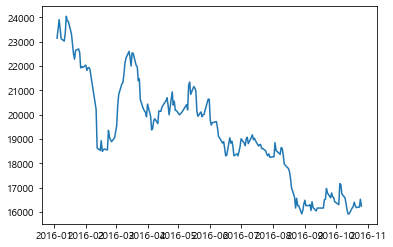

In [558]:
plt.plot(df['종가'][:200])

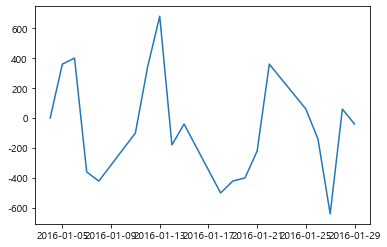

In [559]:
plt.plot(df['일계도'][:20])

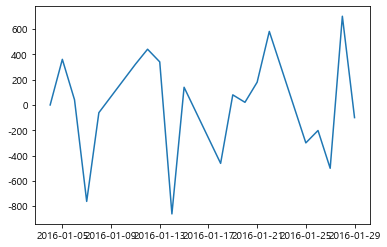

In [560]:
plt.plot(df['이계도'][:20])

In [561]:
import pickle
# 선형회귀 모델
from sklearn import linear_model
# 학습 데이터와 테스트 데이터를 나눠주는 모듈
from sklearn.model_selection import train_test_split
# 모델을 평가해주는 모듈
from sklearn.metrics import mean_absolute_error

In [620]:
df_diff1 = df['일계도']

In [621]:
df_diff1 = np.array(df_diff1)

In [622]:
df_diff1.shape

(1435,)

In [623]:
data_x = [df_diff1[i:i+50] for i in range(1350)]
data_y = [df_diff1[i+51] for i in range(1350)]

In [624]:
train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.3, random_state=3)

In [625]:
len(train_x)

945

In [626]:
train_y[:5]

[-200, -181, -402, -301, -702]

In [627]:
train_x[:2]

[array([-401, -201, 100, 603, -603, 502, 602, -100, -401, 602, -101, -100,
        201, 100, -301, -502, -200, 200, 201, 100, 301, 201, -100, 401,
        -602, -803, 0, -301, 402, 100, 1305, -201, 1304, 502, -803, 703, 0,
        -100, -502, -101, 101, 200, -301, 803, -502, 201, 0, -301, -702,
        100], dtype=object),
 array([-60, 80, -140, 20, 0, 582, -321, -40, -121, 281, -40, -281, -361,
        -181, -120, -261, -402, -401, -442, 402, -301, 0, -342, 141, 261,
        160, -220, 0, 40, -241, 361, -241, -140, 120, 0, 341, 20, 442,
        -181, -200, 200, -160, -20, -181, -120, 863, -40, -382, -160, -221],
       dtype=object)]

In [628]:
# 3. 데이터 분석 : 선형 회귀 모델
model = linear_model.LinearRegression()

In [629]:
model.fit(train_x, train_y)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:956: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


LinearRegression()

In [630]:
test_x[:2]

[array([-1004, 1305, -301, 201, 3111, -904, -2107, 100, -903, 803, -201,
        -502, 201, -602, -401, 2509, -703, 301, -702, -201, 2308, 1004,
        1304, -602, 502, 1405, 6323, 3813, 903, -602, -602, -2810, -2007,
        2509, 803, 2007, 1806, 2108, -2509, 803, -1405, -3412, 100, 803,
        3312, -1506, 101, 401, 803, 5720], dtype=object),
 array([281, 0, 0, 562, 301, -101, 101, -181, 221, -100, -221, 140, 0, 402,
        742, 703, 100, 261, -963, 381, -100, -181, -522, 181, -462, -542,
        -160, 702, -261, 723, -602, 140, 0, -421, -221, 843, 321, -502, 81,
        -301, -402, 281, -181, 302, 602, 301, 0, 602, 201, -301],
       dtype=object)]

In [631]:
test_y[:5]

[2409, 803, -2710, 603, 0]

In [632]:
pred_y = model.predict(test_x)
pred_y[:10]

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([  242.829525  ,    28.16345195,  1303.45786757,  -333.5089381 ,
         219.17710804,  2839.41715492,   -89.0574005 ,    41.6373002 ,
        -123.71580374, -1291.41752176])

In [633]:
trans_pred = pred_y.copy()
# for i in range(len(pred_y)):
#     if pred_y[i] < 0.5:
#         trans_pred[i] = 0
#     else:
#         trans_pred[i] = 1

In [634]:
from sklearn.metrics import mean_squared_error

In [635]:
mae = mean_absolute_error(test_y, trans_pred)
mse = mean_squared_error(test_y, trans_pred)
round(mae, 2), round(mse, 2)

(720.84, 1793571.86)

In [636]:
test_y[:5], trans_pred[:5]

([2409, 803, -2710, 603, 0],
 array([ 242.829525  ,   28.16345195, 1303.45786757, -333.5089381 ,
         219.17710804]))